In [ ]:
!pip install scikit-learn matplotlib seaborn pandas plotly

In [ ]:
!pip install xgboost lightgbm

In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier(),
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('svc', SVC(probability=True))
        ],
        final_estimator=LogisticRegression()
    )
}

In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})

results_df = pd.DataFrame(results)
results_df.sort_values("Accuracy", ascending=False)

,Model,Accuracy
0,Random Forest,0.964912
3,Stacking,0.964912
1,Gradient Boosting,0.956140
2,Bagging,0.947368


In [ ]:
fig = px.bar(results_df, x="Model", y="Accuracy", title="Model Accuracy Comparison", color="Model")
fig.show()

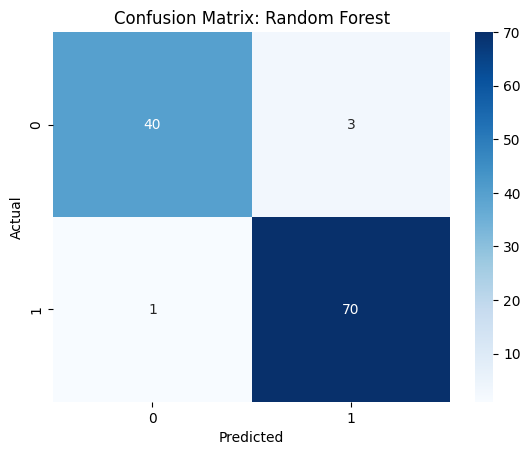

In [ ]:
best_model_name = results_df.sort_values("Accuracy", ascending=False).iloc[0]["Model"]

best_model = models[best_model_name]

y_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title(f"Confusion Matrix: {best_model_name}")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.show()




In [ ]:
print(f"Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

